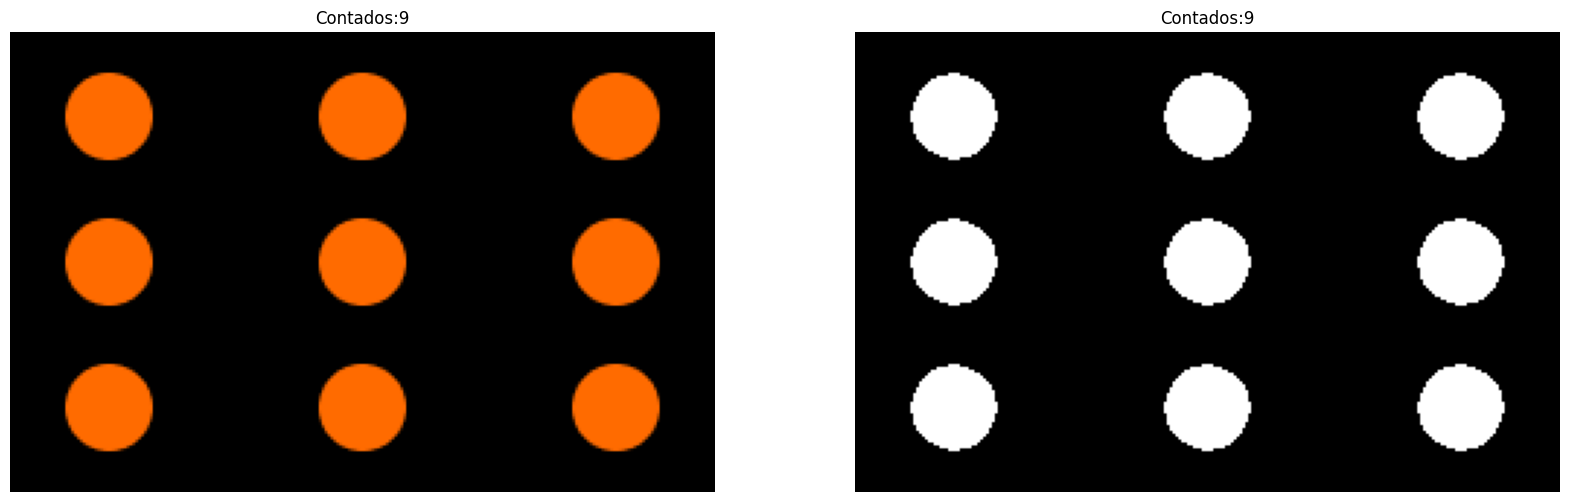

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contar (img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _,binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    borde,_ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cont = len(borde)
    return cont, binaria

imagen = cv2.imread('ppppp.png')

cont, img_bin = contar(imagen)

plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')
plt.show()

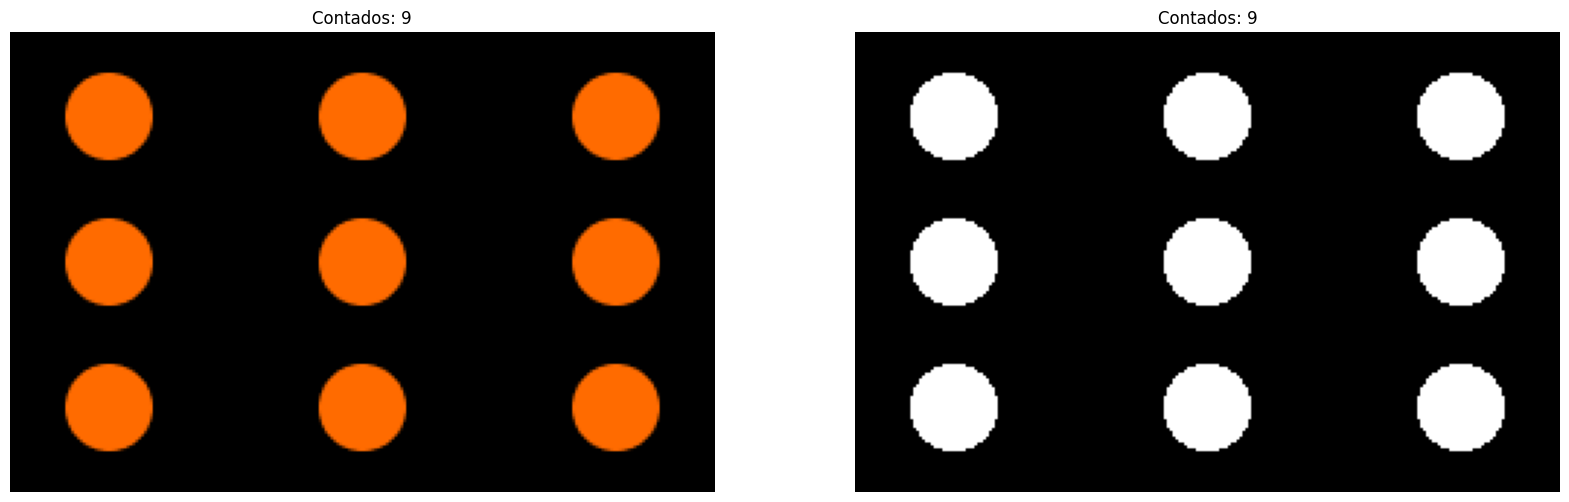

In [42]:
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
import numpy as np

def contar(img):
    # Si la imagen tiene 4 canales (incluyendo alfa), convertirla a 3 canales (RGB)
    if img.shape[2] == 4:
        img = color.rgba2rgb(img)

    # Convertir la imagen a escala de grises
    img_gris = color.rgb2gray(img)
    
    # Aplicar umbralización binaria
    binaria = img_gris > filters.threshold_otsu(img_gris)
    
    # Encontrar contornos
    contornos = measure.label(binaria, connectivity=2)
    cont = contornos.max()
    
    return cont, binaria

# Leer la imagen
imagen = io.imread('ppppp.png')

# Contar los objetos y obtener la imagen binarizada
cont, img_bin = contar(imagen)

# Mostrar la imagen original y la imagen binarizada
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(imagen)
plt.title(f'Contados: {cont}')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_bin, cmap='gray')
plt.title(f'Contados: {cont}')
plt.axis('off')
plt.show()


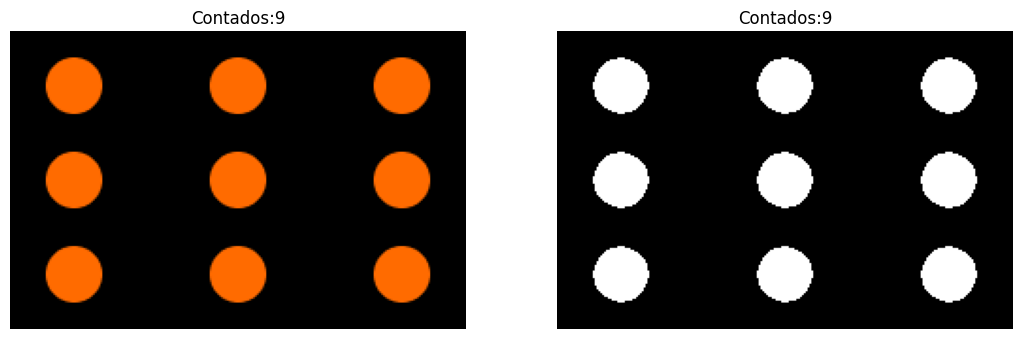

error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


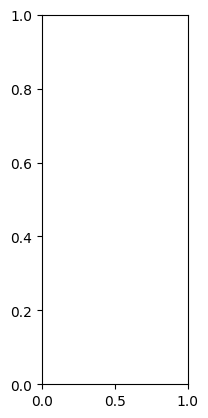

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure as ms


def contar (img):
    img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    _,binaria = cv2.threshold(img_gris, 127, 255, cv2.THRESH_BINARY)
    etiquetar = ms.label(binaria, connectivity=2)
    cont=np.max(etiquetar)
    return cont, binaria, etiquetar

imagen = cv2.imread('ppppp.png')

cont, img_bin, etiquetado = contar(imagen)

plt.figure(figsize=(20, 8))
plt.subplot(131)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(img_bin, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')
plt.show()

plt.subplot(133)
plt.imshow(cv2.cvtColor(etiquetado, cv2.COLOR_BGR2RGB))
plt.title(f'Contados:{cont}')
plt.axis('off')
plt.show()
